In [1]:
# reference: https://saintbeller96.tistory.com/14?category=751441

In [2]:
import os
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

import MeCab
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [3]:
path='/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rc('axes', unicode_minus=False)

In [4]:
df = pd.read_csv('adoor_data/answers.csv', encoding='UTF8')
df[-df['content'].isnull()]

df['created_at'] = pd.to_datetime(df['created_at'])

start_date = pd.Timestamp(2019, 1, 28, 0)
end_date = pd.Timestamp(2019, 4, 1, 0)

mask = (df['created_at'] > start_date) & (df['created_at'] <= end_date)
df = df.loc[mask]

df.head()

,id,author_id,question_id,content,tag_string,created_at,updated_at
0,1,5,236,"오늘 상담쌤과 칭찬에 대한 대화를 나눴다. 내가 애들의 칭찬을 잘 못 믿는, 그리고...",NaN,2019-01-28 14:11:42.543635,2019-01-28 14:11:42.543635
1,2,5,103,원하는 순간에 생각의 흐름을 멈추고 하고자 하는 일에 집중할 수 있는 능력.,NaN,2019-01-28 14:12:09.623446,2019-01-28 14:12:09.623446
2,3,5,98,가만히 공상/유튜브. 혼자 있는 시간.,NaN,2019-01-28 14:13:16.547800,2019-01-28 14:13:16.547800
3,4,5,95,게으름. 그 중에서도 요즘 가장 싫은건 게으름으로 인해 더러워진 방. 너무 짜증나서...,NaN,2019-01-28 14:14:38.838070,2019-01-28 14:14:38.838070
4,6,4,5,진수니랑 같이 프론트 더 멋있게 만들기!!!!!\r\n,NaN,2019-01-28 15:55:14.088330,2019-01-28 15:55:14.088330


In [5]:
def getNVM_lemma(text):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(text)
    word_tag = [w for w in parsed.split("\n")]
    pos = []
    tags = ['NNG','NNP','VV','VA', 'VX', 'VCP','VCN']
    for word_ in word_tag[:-2]:
        word = word_.split("\t")
        tag = word[1].split(",")
        if(len(word[0]) < 2) or ("게" in word[0]):
            continue
        if(tag[-1] != '*'):
            t = tag[-1].split('/')
            if(len(t[0]) > 1 and ('VV' in t[1] or 'VA' in t[1] or 'VX' in t[1])):
                pos.append(t[0])
        else:
            if(tag[0] in tags):
                pos.append(word[0])
    return pos

In [6]:
def getNVM(text):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(text)
    word_tag = [w for w in parsed.split("\n")]
    pos = []
    tags = ['NNG','NNP','VV','VA','VCP','VCN']
    for word_ in word_tag[:-2]:
        word = word_.split("\t")
        tag = word[1].split(",")[0]
        if (tag in tags):
            pos.append(word[0])
    return pos

In [7]:
tf_vect = CountVectorizer(tokenizer=getNVM_lemma, min_df=2)
dtm = tf_vect.fit_transform(df['content'].values.astype('U'))

In [8]:
vocab = dict()
for idx, word in enumerate(tf_vect.get_feature_names()):
    vocab[word] = dtm.getcol(idx).sum()
words = sorted(vocab.items(), key = lambda x:x[1], reverse = True)

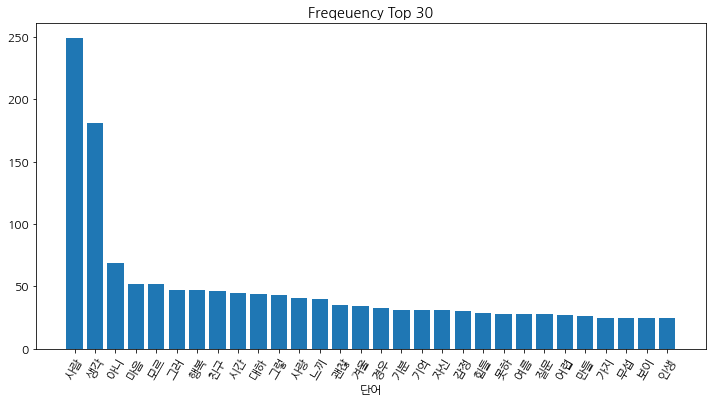

In [9]:
max = 30
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams["font.size"] = 12
plt.bar(range(max), [i[1] for i in words[:max]])
plt.title('Freqeuency Top 30')
plt.xlabel('단어')
plt.xticks(range(max), [i[0] for i in words[:max]], rotation=60)
plt.show()